In [ ]:
prod_df <- read.csv("Productivity_data.csv")
temp_df <- read.csv("temperature_data.csv")
library(dplyr)  
library(broom)
library(ggplot2)

In [ ]:
tail(prod_df)
tail(temp_df)

In [ ]:
prod_df_simple <- prod_df %>% 
    filter(Qtr == 3, Year < 2021) %>% 
    select(Year, Qtr, Labor.productivity)

head(prod_df_simple)

prod_df_simple_out <- prod_df %>% 
    filter(Qtr == 3, Year < 2020, Year !=2009 ) %>% 
    select(Year, Qtr, Labor.productivity)

head(prod_df_simple_out)

In [ ]:
temp_df_simple <- temp_df %>% 
    filter(Year > 1986) %>%
    select(Year, Summer)

head(temp_df_simple)

temp_df_simple_out <- temp_df %>% 
    filter(Year > 1986, Year < 2020, Year !=2009) %>%
    select(Year, Summer)

head(temp_df_simple_out)

In [ ]:
prod_temp_join <- inner_join(prod_df_simple, temp_df_simple, by = "Year")

prod_temp_join <- prod_temp_join %>%    
    rename("Temp_Delta" = "Summer" )


head(prod_temp_join)

prod_temp_join_out <- inner_join(prod_df_simple_out, temp_df_simple_out, by = "Year")

prod_temp_join_out <- prod_temp_join_out %>%    
    rename("Temp_Delta" = "Summer" )

head(prod_temp_join_out)

In [9]:
Reg <- lm(Labor.productivity ~ Temp_Delta + Year, prod_temp_join)
tidy(Reg)

Reg <- lm(Labor.productivity ~ Temp_Delta + Year, prod_temp_join_out)
tidy(Reg)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),42.39937878,214.0973800,0.1980378,0.8443084
Temp_Delta,-0.43188726,1.0497900,-0.4114035,0.6836072
Year,-0.01955806,0.1070973,-0.1826195,0.8562857


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),351.9524536,147.91057341,2.3794949,0.02413333
Temp_Delta,0.1274970,0.72399802,0.1761013,0.86143838
Year,-0.1748201,0.07401692,-2.3618943,0.02511006


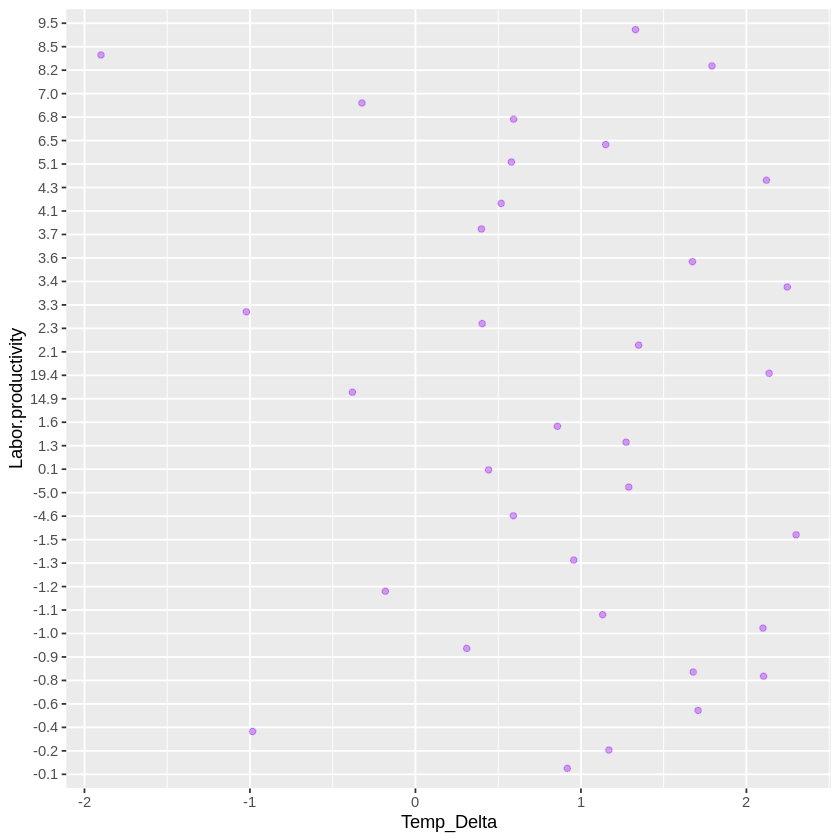

In [10]:
ggplot(prod_temp_join, aes(x = Temp_Delta, y = Labor.productivity)) +
    geom_jitter(colour = "purple", alpha = 0.4) 